<hr>

### Exercise 1.49


The number $2520$ is the smallest number that can be divided by each of the numbers from $1$ to $10$ without any remainder. Write code to find the smallest positive number that is evenly divisible by all of the numbers from $1$ to $20$.

**Hint:** You will likely want to use [modular division](https://python-reference.readthedocs.io/en/latest/docs/operators/modulus.html) for this problem.

(This problem is modified from [3])



In [31]:
#### Solution 1.49 - Approach 1

# IDEA:  we can find the smallest multiple of a number by checking if it is divisible by all numbers from 1 to n, 
#       and incrementing it until we find the smallest multiple

import time

def smallest_multiple(n):
    # Initialize the smallest multiple
    smallest_mult = n
    # Loop until we find the smallest multiple
    while True:
        # Check if the current number is divisible by all numbers from 1 to n
        if all(smallest_mult % i == 0 for i in range(1, n + 1)):
            return smallest_mult
        # Increment the smallest multiple
        smallest_mult += n

number = 20
start_time = time.time()
lcm = smallest_multiple(number)
end_time = time.time()

print(f'Approach 1: The smallest positive number that is evenly divisible by')
print(f'all of the numbers from 1 to {number} is {lcm:,}.')
print(f'Time taken: {end_time - start_time:.5f} seconds\n')

#### Solution 1.49 - Approach 2 (much faster, but not obvious)

# IDEA:  we can find the least common multiple of a number by using the formula lcm(a, b) = a*b / gcd(a, b), 
#        and applying it iteratively to all numbers from 1 to n

def least_common_multiple(n):
    # Initialize the least common multiple
    lcm = 1
    # Loop through all numbers from 2 to n
    for i in range(2, n + 1):
        lcm *= i // np.gcd(lcm, i)
    return lcm

number = 20
start_time = time.time()
lcm = least_common_multiple(number)
end_time = time.time()
print(f'Approach 2: The smallest positive number that is evenly divisible by')
print(f'all of the numbers from 1 to {number} is {lcm:,}')
print(f'Time taken: {end_time - start_time:.5f} seconds\n')

Approach 1: The smallest positive number that is evenly divisible by
all of the numbers from 1 to 20 is 232,792,560.
Time taken: 6.34311 seconds

Approach 2: The smallest positive number that is evenly divisible by
all of the numbers from 1 to 20 is 232,792,560
Time taken: 0.00100 seconds



<hr>

### Exercise 1.50

The following iterative sequence is defined for the set of positive integers:

$$
\begin{aligned}
    & n \to \frac{n}{2} \quad \text{(n is even)} \\
    & n \to 3n + 1 \quad \text{(n is odd)}
\end{aligned}
$$

Using the rule above and starting with $13$, we generate the following sequence:

$$
13 \to  40 \to 20 \to 10 \to 5 \to 16 \to 8 \to 4 \to 2 \to 1
$$

It can be seen that this sequence (starting at 13 and finishing at 1) contains 10 terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at 1. This has been verified on computers for massively large starting numbers, but this does not constitute a proof that it will work this way for *all* starting numbers.

Write code to determine which starting number, under one million, produces the longest chain.

**Note:** Once the chain starts, the terms are allowed to go above one million. 



In [34]:
# Solution 1.50 - Approach 1
# IDEA:  we can find the largest chain of numbers that eventually reach 1 by iterating through all numbers from 1 to n,
import time

time_start = time.time()
# Initialize variables to track the longest chain and its starting number
longest_starting_number = 0
longest_chain = 0

# Iterate through all numbers from 1 to 1,000,000
for start in range(1, 1_000_000):
    count = 1  # Start with count = 1 to include the starting number
    n = start
    # Generate the Collatz sequence for the current starting number
    while n != 1:
        if n % 2 == 0:
            n = n // 2  # If n is even, divide it by 2
        else:
            n = 3 * n + 1  # If n is odd, multiply it by 3 and add 1
        count += 1  # Increment the count for each step in the sequence
    # Update the longest chain and starting number if the current chain is longer
    if count > longest_chain:
        longest_chain = count
        longest_starting_number = start
end_time = time.time()

print(f'The starting number {longest_starting_number:,} produces the longest chain of {longest_chain} terms.')
print(f'Time taken: {end_time - time_start:.5f} seconds\n')

#### Solution - Approach 2
# IDEA: keep track of the length of the chain for each number and check to see if we've already calculated it

def collatz_length(n, cache={}):
    """Returns the length of the Collatz sequence starting at n using memoization (caching)."""
    if n in cache:
        return cache[n]

    original_n = n
    length = 1
    while n != 1:
        if n in cache:
            length += cache[n] - 1
            break
        n = n // 2 if n % 2 == 0 else 3 * n + 1
        length += 1

    cache[original_n] = length
    return length

def longest_collatz(limit):
    """Finds the starting number under `limit` that produces the longest Collatz sequence."""
    max_length = 0
    best_start = 0

    for i in range(1, limit):
        length = collatz_length(i)
        if length > max_length:
            max_length = length
            best_start = i

    return best_start, max_length

time_start = time.time()
# Compute the result for numbers under 1,000,000
limit = 1_000_000
best_start, max_length = longest_collatz(limit)
end_time = time.time()

print(f"Longest Collatz sequence starts at {best_start:,} with length {max_length}")
print(f'Time taken: {end_time - time_start:.5f} seconds\n')


The starting number 837,799 produces the longest chain of 525 terms.
Time taken: 13.44103 seconds

Longest Collatz sequence starts at 837,799 with length 525
Time taken: 0.72954 seconds



<hr>

### Exercise 1.54

Find the Taylor Series for $f(x) = \frac{1}{\ln(x)}$ centered at the point $x_0 = e$. Then use the Taylor Series to approximate the number $\frac{1}{\ln(3)}$ to 4 decimal places. 



In [ ]:
# 1.54 Solution

# We're going to cheat and use SymPy to generate the series (a symbolic math library)

import sympy as sp
import numpy as np

# Define the variable and function
x = sp.symbols('x')
f = 1 / sp.ln(x)

# Taylor series expansion centered at x_0 = e
x0 = sp.E  # e in symbolic form
taylor_series = sp.series(f, x, x0, n=5).removeO()  # Expanding up to 4th degree and remove big-O term

# Convert the Taylor series into a Python function
taylor_func = sp.lambdify(x, taylor_series, 'numpy')

# Example usage: Evaluate the Taylor series at x = 3
approximation = taylor_func(3)

# the exact value and absolute error    
exact_value = 1 / np.log(3)
abs_error = np.abs(approximation - exact_value)

# Print results
print("Taylor Series:", taylor_series)
print("Approximation at x=3:", approximation)
print("Exact value at x=3:", exact_value)
print("Absolute error:", abs_error)


Taylor Series: 11*(x - E)**4*exp(-4)/3 - 7*(x - E)**3*exp(-3)/3 + 3*(x - E)**2*exp(-2)/2 - (x - E)*exp(-1) + 1
Approximation at x=3: 0.9102986473536269
Exact value at x=3: 0.9102392266268373
Absolute error: 5.942072678954968e-05


<hr>

### Exercise 1.55

In this problem, we will use Taylor Series to build approximations for the irrational number $\pi$.

**a.** Write the Taylor series centered at $x_0=0$ for the function  
$$ f(x) = \frac{1}{1+x}. $$


Earlier in the book we show that the Taylor series for $\frac{1}{1-x}$ centered at $x_0 = 0$ is given by:

$$
\frac{1}{1-x} = 1 + x + x^2 + x^3 + x^4 + \cdots = \sum_{n=0}^{\infty} x^n
$$

This series converges for $|x| < 1$.

Since we want the series for $\frac{1}{1+x}$ at $x_0 = 0$ we can substitute $-x$ for $x$ in the previous series to get:

$$
\frac{1}{1+x} = 1 - x + x^2 - x^3 + x^4 - \cdots = \sum_{n=0}^{\infty} (-1)^n x^n
$$

This series converges for $|x| < 1$.


**b.** Now we want to get the Taylor Series for the function $g(x) = \frac{1}{1+x^2}$. It would be quite time-consuming to take all of the necessary derivatives to get this Taylor Series. Instead, we will use our answer from part (a) of this problem to shortcut the whole process.  
   **i.** Substitute $x^2$ for every $x$ in the Taylor Series for $f(x) = \frac{1}{1+x}$.  
   **ii.** Make a few plots to verify that we indeed now have a Taylor Series for the function $g(x) = \frac{1}{1+x^2}$.


# 1.54b Solution

To get the Taylor Series for $g(x) = \frac{1}{1+x^2}$ from the series for $f(x) = \frac{1}{1+x}$, we substitute $x^2$ for x$ in the series for $f(x)$:

$$
\frac{1}{1+x} = \sum_{n=0}^{\infty} (-1)^n x^n
$$

Substituting x^2$ for x$:

$$
\frac{1}{1+x^2} = \sum_{n=0}^{\infty} (-1)^n (x^2)^n = \sum_{n=0}^{\infty} (-1)^n x^{2n}
$$

To verify, we can plot the Taylor Series approximation and compare it to the actual function $g(x) = \frac{1}{1+x^2}$.

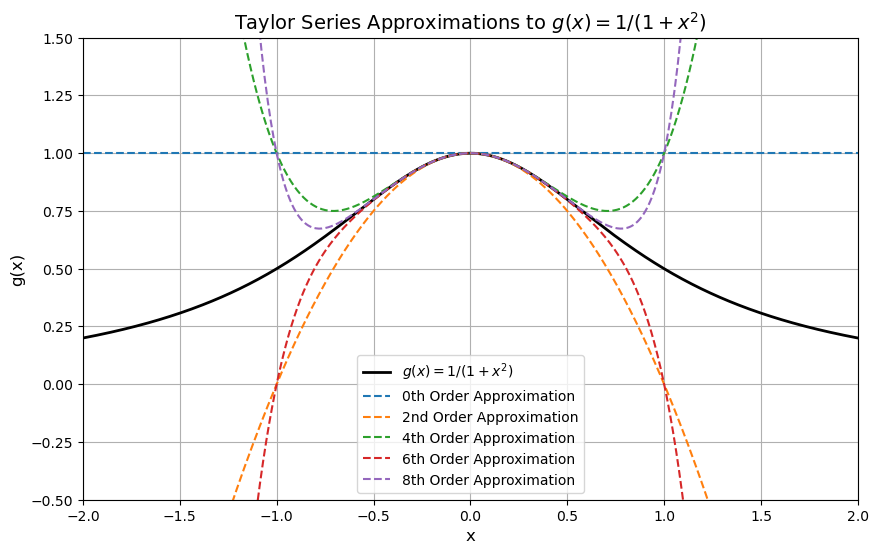

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def taylor_approximation_g(x, degree):
    """Compute the Taylor series approximation to 1/(1+x^2) up to the given degree."""
    approximation = np.zeros_like(x)
    for n in range(degree//2 + 1):
        approximation += (-1)**n * x**(2*n)
    return approximation

# Define the range of x values
x = np.linspace(-2, 2, 500)

# Compute the Taylor approximations
constant_approx = taylor_approximation_g(x, 0)
second_order_approx = taylor_approximation_g(x, 2)
fourth_order_approx = taylor_approximation_g(x, 4)
sixth_order_approx = taylor_approximation_g(x, 6)
eighth_order_approx = taylor_approximation_g(x, 8)

# Compute the actual function
actual_function = 1 / (1 + x**2)

# Plot the results
plt.figure(figsize=(10, 6))

plt.plot(x, actual_function, label="$g(x) = 1/(1+x^2)$", color="black", linewidth=2)
plt.plot(x, constant_approx, label="0th Order Approximation", linestyle="--")
plt.plot(x, second_order_approx, label="2nd Order Approximation", linestyle="--")
plt.plot(x, fourth_order_approx, label="4th Order Approximation", linestyle="--")
plt.plot(x, sixth_order_approx, label="6th Order Approximation", linestyle="--")
plt.plot(x, eighth_order_approx, label="8th Order Approximation", linestyle="--")

# Set axis limits
plt.xlim(-2, 2)
plt.ylim(-0.5, 1.5)

# Add labels, title, and legend
plt.xlabel("x", fontsize=12)
plt.ylabel("g(x)", fontsize=12)
plt.title("Taylor Series Approximations to $g(x) = 1/(1+x^2)$", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)

# Show the plot
plt.show()



**c.** Recall from Calculus that  
$$ \int \frac{1}{1+x^2} dx = \arctan(x). $$  
Hence, if we integrate each term of the Taylor Series that results from part (b), we should have a Taylor Series for $\arctan(x)$. What is that series? (See Footnote 1)


To integrate the series for $\frac{1}{1+x^2}$ to get a series for $\arctan(x)$, we start with the Taylor series for $\frac{1}{1+x^2}$:

$$
\frac{1}{1+x^2} = \sum_{n=0}^{\infty} (-1)^n x^{2n}
$$

We integrate term by term:

$$
\int \frac{1}{1+x^2} \, dx = \int \sum_{n=0}^{\infty} (-1)^n x^{2n} \, dx = \sum_{n=0}^{\infty} (-1)^n \int x^{2n} \, dx
$$

The integral of $x^{2n}$ is $\frac{x^{2n+1}}{2n+1}$, so we get:

$$
\arctan(x) = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n+1}}{2n+1}
$$

This is the Taylor series for $\arctan(x)$.


**d.** Now recall the following from Calculus:  
   - $\tan(\pi/4) = 1$,  
   - so $\arctan(1) = \pi/4$,  
   - and therefore $\pi = 4\arctan(1)$.  

Let’s use these facts along with the Taylor Series for $\arctan(x)$ to approximate $\pi$: we can just plug in $x=1$ to the series, add up a bunch of terms, and then multiply by 4. Write a loop in Python that builds successively better and better approximations of $\pi$. Stop the loop when you have an approximation that is correct to 6 decimal places. 



In [7]:
# 1.54d Solution

# Initialize variables
approx_pi = 0
n = 0
target_precision = 1e-6

# Loop to build successively better approximations of pi
while True:
    term = (-1)**n / (2*n + 1)
    approx_pi += term
    n += 1
    if abs(4 * approx_pi - np.pi) < target_precision:
        break

# Multiply the final approximation by 4 to get pi
approx_pi *= 4

# Print the results
print(f'Approximation of pi: {approx_pi:.6f}')
print(f'Number of terms: {n}')
print(f'Absolute error: {abs(approx_pi - np.pi):.6e}')

Approximation of pi: 3.141594
Number of terms: 1000001
Absolute error: 9.999990e-07


To approximate $\pi$ more efficiently, we can use the Machin-like formula for $\pi$:

$$
\pi = 16 \arctan\left(\frac{1}{5}\right) - 4 \arctan\left(\frac{1}{239}\right)
$$

The Taylor series for $\arctan(x)$ is:

$$
\arctan(x) = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n+1}}{2n+1}
$$

Using this series, we can approximate $\pi$ as follows:


In [ ]:
def arctan(x, terms=100):
    result = 0
    for n in range(terms):
        term = ((-1)**n * x**(2*n + 1)) / (2*n + 1)
        result += term
    return result

def approximate_pi(terms=100):
    pi_approx = 16 * arctan(1/5, terms) - 4 * arctan(1/239, terms)
    return pi_approx

# Set the number of terms for the series
terms = 1

# Calculate the approximation of pi
pi_approx = approximate_pi(terms)

# Print the results
print(f'Approximation of pi: {pi_approx:.15f}')
print(f'Absolute error: {abs(pi_approx - np.pi):.15e}')


Approximation of pi: 3.141592653589794
Absolute error: 8.881784197001252e-16




This method converges much faster than using the series for $\arctan(1)$. Adjust the `terms` variable to increase or decrease the number of terms in the series for better accuracy.

<hr>

### Exercise 1.56

In this problem, we will prove the famous (and the author’s favorite) formula:

$$ e^{i\theta} = \cos(\theta) + i \sin(\theta). $$

This is known as Euler’s formula after the famous mathematician Leonard Euler. Show all of your work for the following tasks:

a. Write the Taylor series for the functions $e^x$, $\sin(x)$, and $\cos(x)$.

b. Replace $x$ with $i\theta$ in the Taylor expansion of $e^x$. Recall that $i = \sqrt{-1}$ so $i^2 = -1$, $i^3 = -i$, and $i^4 = 1$. Simplify all of the powers of $i\theta$ that arise in the Taylor expansion. I’ll get you started:

$$
\begin{aligned}
  e^x &= 1 + x + \frac{x^2}{2} + \frac{x^3}{3!} + \frac{x^4}{4!} + \frac{x^5}{5!} + \cdots \\
  e^{i\theta} &= 1 + (i\theta) + \frac{(i\theta)^2}{2!} + \frac{(i\theta)^3}{3!} + \frac{(i\theta)^4}{4!} + \frac{(i\theta)^5}{5!} + \cdots \\
  &= 1 + i\theta + i^2 \frac{\theta^2}{2!} + i^3 \frac{\theta^3}{3!} + i^4 \frac{\theta^4}{4!} + i^5 \frac{\theta^5}{5!} + \cdots \\
  &= \ldots \text{ keep simplifying ... } \ldots
\end{aligned}
$$

c. Gather all of the real terms and all of the imaginary terms together. Factor the $i$ out of the imaginary terms. What do you notice?

d. Use your result from part (c) to prove that $e^{i\pi} + 1 = 0$. 



### Solution to Exercise 1.56

#### a. Write the Taylor series for the functions $e^x$, $\sin(x)$, and $\cos(x)$.

The Taylor series for $e^x$ centered at $x = 0$ is:
$$
e^x = \sum_{n=0}^{\infty} \frac{x^n}{n!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \cdots
$$

The Taylor series for $\sin(x)$ centered at $x = 0$ is:
$$
\sin(x) = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n+1}}{(2n+1)!} = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!} + \cdots
$$

The Taylor series for $\cos(x)$ centered at $x = 0$ is:
$$
\cos(x) = \sum_{n=0}^{\infty} (-1)^n \frac{x^{2n}}{(2n)!} = 1 - \frac{x^2}{2!} + \frac{x^4}{4!} - \frac{x^6}{6!} + \cdots
$$

#### b. Replace $x$ with i\theta$ in the Taylor expansion of $e^x$. Simplify all of the powers of $i\theta$.

Starting with the Taylor series for $e^x$:
$$
e^x = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + \cdots
$$

Replace $x$ with $i\theta$:
$$
e^{i\theta} = 1 + (i\theta) + \frac{(i\theta)^2}{2!} + \frac{(i\theta)^3}{3!} + \frac{(i\theta)^4}{4!} + \cdots
$$

Simplify the powers of $i$:
$$
e^{i\theta} = 1 + i\theta + \frac{(i\theta)^2}{2!} + \frac{(i\theta)^3}{3!} + \frac{(i\theta)^4}{4!} + \cdots
$$
$$
= 1 + i\theta - \frac{\theta^2}{2!} - i\frac{\theta^3}{3!} + \frac{\theta^4}{4!} + \cdots
$$

#### c. Gather all of the real terms and all of the imaginary terms together. Factor the i$ out of the imaginary terms.

$$
e^{i\theta} = \left(1 - \frac{\theta^2}{2!} + \frac{\theta^4}{4!} - \cdots \right) + i\left(\theta - \frac{\theta^3}{3!} + \frac{\theta^5}{5!} - \cdots \right)
$$

Notice that the real part is the Taylor series for $\cos(\theta)$ and the imaginary part is $i$ times the Taylor series for $\sin(\theta)$:
$$
e^{i\theta} = \cos(\theta) + i\sin(\theta)
$$

#### d. Use your result from part (c) to prove that $e^{i\pi} + 1 = 0$.

Using Euler's formula:
$$
e^{i\pi} = \cos(\pi) + i\sin(\pi)
$$

We know that:
$$
\cos(\pi) = -1 \quad \text{and} \quad \sin(\pi) = 0
$$

Therefore:
$$
e^{i\pi} = -1 + 0i = -1
$$

Adding 1 to both sides:
$$
e^{i\pi} + 1 = -1 + 1 = 0
$$

Thus, we have proved that:
$$
e^{i\pi} + 1 = 0
$$

<hr>

### Exercise 1.57

In physics, the *relativistic energy* of an object is defined as:

$$E_{rel} = \gamma mc^2$$

where:

$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}.$$

In these equations, $m$ is the mass of the object, $c$ is the speed of light ($c \approx 3 \times 10^8 \, \text{m/s}$), and $v$ is the velocity of the object. For an object of fixed mass ($m$), we can expand the Taylor Series centered at $v = 0$ for $E_{rel}$ to get:

$$E_{rel} = mc^2 + \frac{1}{2} mv^2 + \frac{3}{8} \frac{mv^4}{c^2} + \frac{5}{16} \frac{mv^6}{c^4} + \cdots.$$

a. What do we recover if we consider an object with zero velocity?

b. Why might it be completely reasonable to only use the quadratic approximation:

$$E_{rel} = mc^2 + \frac{1}{2} mv^2$$

for the relativistic energy equation? (See Footnote 2)

c. (*Some physics knowledge required*) What do you notice about the second term in the Taylor Series approximation of the relativistic energy function?

d. Show all of the work to derive the Taylor Series centered at $v = 0$ given above.



### Solution to Exercise 1.57

#### a. What do we recover if we consider an object with zero velocity?

If the velocity $v = 0$, then the relativistic energy equation simplifies to:

$$ E_{rel} = mc^2 $$

This is the famous equation from Einstein's theory of relativity, which states that the energy of an object at rest is equal to its mass times the speed of light squared.

#### b. Why might it be completely reasonable to only use the quadratic approximation:

$$ E_{rel} = mc^2 + \frac{1}{2} mv^2 $$

for the relativistic energy equation?

For velocities $v$ that are much smaller than the speed of light $c$, the higher-order terms in the Taylor series expansion become very small and can be neglected. Therefore, the quadratic approximation $E_{rel} = mc^2 + \frac{1}{2} mv^2$ is sufficient to describe the energy of the object accurately. This approximation is often used in classical mechanics where velocities are much smaller than the speed of light.

#### c. (*Some physics knowledge required*) What do you notice about the second term in the Taylor Series approximation of the relativistic energy function?

The second term in the Taylor Series approximation of the relativistic energy function is $\frac{1}{2} mv^2$, which is the classical kinetic energy of an object. This shows that the relativistic energy equation reduces to the classical kinetic energy equation for small velocities.

#### d. Show all of the work to derive the Taylor Series centered at v = 0$ given above.

To derive the Taylor Series for $E_{rel}$ centered at $v = 0$, we start with the expression for $\gamma$:

$$ \gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}} $$

We can rewrite \gamma$ as:

$$ \gamma = \left(1 - \frac{v^2}{c^2}\right)^{-\frac{1}{2}} $$

To expand this expression, we use the Taylor series expansion for $(1 - x)^{-\frac{1}{2}}$. The Taylor series for a function $f(x)$ around $x = 0$ is given by:

$$ f(x) = f(0) + f'(0)x + \frac{f''(0)}{2!}x^2 + \frac{f'''(0)}{3!}x^3 + \cdots $$

For $f(x) = (1 - x)^{-\frac{1}{2}}$, we need to find the derivatives of $f(x)$ and evaluate them at $x = 0$.

1. $f(x) = (1 - x)^{-\frac{1}{2}}$
2. $f'(x) = \frac{d}{dx} (1 - x)^{-\frac{1}{2}} = \frac{1}{2}(1 - x)^{-\frac{3}{2}}$
3. $f''(x) = \frac{d}{dx} \left( \frac{1}{2}(1 - x)^{-\frac{3}{2}} \right) = \frac{3}{4}(1 - x)^{-\frac{5}{2}}$
4. $f'''(x) = \frac{d}{dx} \left( \frac{3}{4}(1 - x)^{-\frac{5}{2}} \right) = \frac{15}{8}(1 - x)^{-\frac{7}{2}}$

Evaluating these derivatives at $x = 0$:

1. $f(0) = 1$
2. $f'(0) = \frac{1}{2}$
3. $f''(0) = \frac{3}{4}$
4. $f'''(0) = \frac{15}{8}$

Using these values, the Taylor series expansion for $(1 - x)^{-\frac{1}{2}}$ around $x = 0$ is:

$$ (1 - x)^{-\frac{1}{2}} = 1 + \frac{1}{2}x + \frac{3}{8}x^2 + \frac{5}{16}x^3 + \cdots $$

Substituting $x = \frac{v^2}{c^2}$:

$$ \gamma = 1 + \frac{1}{2}\left(\frac{v^2}{c^2}\right) + \frac{3}{8}\left(\frac{v^4}{c^4}\right) + \frac{5}{16}\left(\frac{v^6}{c^6}\right) + \cdots $$

Multiplying by $mc^2$ to get $E_{rel}$:

$$ E_{rel} = mc^2 \left(1 + \frac{1}{2}\left(\frac{v^2}{c^2}\right) + \frac{3}{8}\left(\frac{v^4}{c^4}\right) + \frac{5}{16}\left(\frac{v^6}{c^6}\right) + \cdots \right) $$

Simplifying, we get:

$$ E_{rel} = mc^2 + \frac{1}{2}mv^2 + \frac{3}{8}\frac{mv^4}{c^2} + \frac{5}{16}\frac{mv^6}{c^4} + \cdots $$

This is the Taylor Series expansion for the relativistic energy function centered at $v = 0$.

<hr>

### Exercise 1.58

**The Python Caret Operator**

Now that you’re used to using Python to do some basic computations, you are probably comfortable with the fact that the caret, `^`, does **not** do exponentiation like it does in many other programming languages. But what does the caret operator do? That’s what we explore here.

a. Consider the numbers $9$ and $5$. Write these numbers in binary representation. We are going to use four bits to represent each number (it is okay if the first bit happens to be zero).

$$
\begin{aligned}
9 & = \underline{\hspace{0.2in}} \, \underline{\hspace{0.2in}} \, \underline{\hspace{0.2in}} \, \underline{\hspace{0.2in}} \\
5 & = \underline{\hspace{0.2in}} \, \underline{\hspace{0.2in}} \, \underline{\hspace{0.2in}} \, \underline{\hspace{0.2in}}
\end{aligned}
$$


$(9)_{10} = (1001)_2, (5)_{10} = (0101)_2$


b. Now go to Python and evaluate the expression `9^5`. Convert Python’s answer to a binary representation (again using four bits).


In [1]:
# 1.58b Solution
9^5

12

$(12)_{10} = (1100)_2$


c. Make a conjecture: How do we go from the binary representations of $a$ and $b$ to the binary representation for Python’s `a^b` for numbers $a$ and $b$? Test and verify your conjecture on several different examples, and then write a few sentences explaining what the caret operator does in Python. 



Notice that we get 0's wherever the bits are the same and 1's where they differ.  This is called the XOR operator which is short for "exclusive or".   In other words we get 1 whenever we have "0" or "1" but not both, otherwise we get 0.

In [2]:
def display_binary_xor(a: int, b: int):
    # Determine the minimum bit length needed to represent both numbers
    bit_length = max(a.bit_length(), b.bit_length())

    # Format numbers as binary with leading zeros
    a_bin = f"{a:0{bit_length}b}"
    b_bin = f"{b:0{bit_length}b}"
    xor_bin = f"{(a ^ b):0{bit_length}b}"  # Compute XOR and format

    # Display the results
    print(f"a   = {a_bin}")
    print(f"b   = {b_bin}")
    print(f"a^b = {xor_bin}")

display_binary_xor(9,5)

a   = 1001
b   = 0101
a^b = 1100


In [4]:
display_binary_xor(27,3)

a   = 11011
b   = 00011
a^b = 11000


<hr>

#### References

* [3] M. Boelkins, “Active calculus.” [https://activecalculus.org/single/frontmatter.html](https://activecalculus.org/single/frontmatter.html), 2018.

* [3] “ProjectEuler.net.” [https://projecteuler.net/](https://projecteuler.net/).

* [4] A. Greenbaum and T. Chartier, *Numerical methods: Design, analysis, and computer implementation of algorithms*. Princeton University Press, 2012.

#### Footnotes

1. There are many reasons why integrating an infinite series term by term should give you a moment of pause. For the sake of this problem, we are doing this operation a little blindly, but in reality, we should have verified that the infinite series actually converges uniformly. [↩︎](#fnref1)

2. This is something that people in physics and engineering do all the time – there is some complicated nonlinear relationship that they wish to use, but the first few terms of the Taylor Series capture almost all of the behavior since the higher-order terms are very small. [↩︎](#fnref2).